,Length,Sort Time,Linear Time,Binary Time,Binary + Sort Time
Set 1,5000,3863.4528,1.4542,0.0093,3863.4621
Set 2,10000,16432.6131,1.5704,0.0062,16432.6193
Set 3,15000,39678.2925,0.9869,0.0059,39678.2984
Set 4,20000,67127.8818,0.6566,0.0059,67127.8877
Set 5,25000,109090.5395,4.6099,0.0057,109090.5452


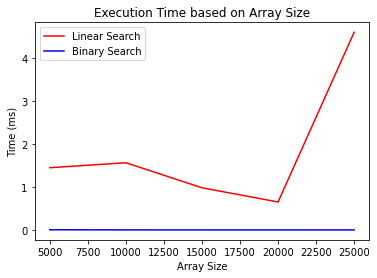

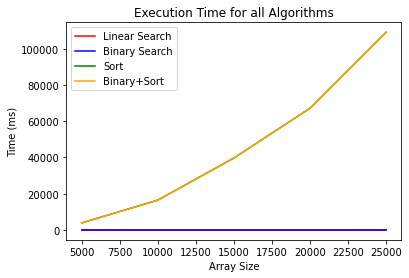

In [19]:
import numpy as np
import pandas as pd
import time
import timeit
import matplotlib.pyplot as plt

from random import seed
from random import random



def binary_search(list, item):
    # low and high keep track of which part of the list you'll search in.
    low = 0
    high = len(list) - 1  #high = 4


    # While you haven't narrowed it down to one element ...
    while low <= high:
      # ... check the middle element
      mid = (low + high) // 2  #mid = 2
      guess = list[mid]
      # Found the item.
      if guess == item:
        return mid
    # The guess was too high.
      if guess > item:
        high = mid - 1  #high = 1
      # The guess was too low.
      else:
        low = mid + 1

    # Item doesn't exist
    return None

def linear_search(mylist, item):
    i = 0
    while i < len(mylist):
        if mylist[i] == item:
            return i
        else:
            i = i + 1
        
    return None


def get_sort_time(array):
    start_time = time.perf_counter()
    #array = np.sort(array)
    array = selectionSort(array)
    end_time = time.perf_counter()
    time_calc = end_time - start_time
    time_calc = time_calc * 1000
    
    return time_calc

def get_binary_time(array, num):
    start_time = time.perf_counter()
    binary_search(array, num)
    end_time = time.perf_counter()
    time_calc = end_time - start_time
    time_calc = time_calc * 1000
    
    return time_calc

def get_linear_time(array, num):
    start_time = time.perf_counter()
    linear_search(array, num)
    end_time = time.perf_counter()
    time_calc = end_time - start_time
    time_calc = time_calc * 1000
    
    return time_calc


# Finds the smallest value in an array
def findSmallest(arr):
  # Stores the smallest value
  smallest = arr[0]
  # Stores the index of the smallest value
  smallest_index = 0
  for i in range(1, len(arr)):
    if arr[i] < smallest:
      smallest_index = i
      smallest = arr[i]      
  return smallest_index

# Sort array
def selectionSort(arr):
  newArr = []
  for i in range(len(arr)):
      # Finds the smallest element in the array and adds it to the new array
      smallest = findSmallest(arr)
      #newArr.append(arr.pop(smallest))  #look for .pop equivalent for array
      newArr.append(np.delete(smallest,0))
  return newArr

np.random.seed(3) 

#Create arrays
set1 = np.random.randint(1,30000,5000)
set2 = np.random.randint(1,30000,10000)
set3 = np.random.randint(1,30000,15000)
set4 = np.random.randint(1,30000,20000)
set5 = np.random.randint(1,30000,25000)



#first get sort times for the arrays using selection sort algorithm
sort_time1 = (get_sort_time(set1))
sort_time2 = (get_sort_time(set2))
sort_time3 = (get_sort_time(set3))
sort_time4 = (get_sort_time(set4))
sort_time5 = (get_sort_time(set5))


#get max number for each set
max1 = max(set1)
max2 = max(set2)
max3 = max(set3)
max4 = max(set4)
max5 = max(set5)


#next get binary search times:
bs_time1 = (get_binary_time(set1, max1))
bs_time2 = (get_binary_time(set2, max2))
bs_time3 = (get_binary_time(set3, max3))
bs_time4 = (get_binary_time(set4, max4))
bs_time5 = (get_binary_time(set5, max5))


#Now get linear search times
ls_time1 = (get_linear_time(set1, max1))
ls_time2 = (get_linear_time(set2, max2))
ls_time3 = (get_linear_time(set3, max3))
ls_time4 = (get_linear_time(set4, max4))
ls_time5 = (get_linear_time(set5, max5))


run_times = {'Length': [len(set1), len(set2), len(set3), len(set4), len(set5)],
            'Sort Time (ms)': [sort_time1, sort_time2, sort_time3, sort_time4, sort_time5],
            'Linear Time (ms)': [ls_time1, ls_time2, ls_time3, ls_time4, ls_time5],
            'Binary Time (ms)': [bs_time1, bs_time2, bs_time3, bs_time4, bs_time5],
            'Binary + Sort Time (ms)': [bs_time1 + sort_time1, bs_time2 + sort_time2, bs_time3 + sort_time3, bs_time4 + sort_time4, bs_time5 + sort_time5]
            }

#create table
df = pd.DataFrame(run_times, columns = ['Length','Sort Time (ms)','Linear Time (ms)','Binary Time (ms)','Binary + Sort Time (ms)'],
                  index=['Set 1','Set 2','Set 3','Set 4','Set 5'])
display(df)

#create plot
ax1 = plt.gca()
df.plot(kind = 'line',y='Linear Time',x='Length',color='red', label = 'Linear Search', ax = ax1)
df.plot(kind = 'line',y='Binary Time',x='Length',color='blue', label = 'Binary Search', ax = ax1)
plt.xlabel('Array Size')
plt.ylabel('Time (ms)')
plt.title('Execution Time based on Array Size')
plt.show()

#create 2nd plot
ax2 = plt.gca()
df.plot(kind = 'line',y='Linear Time',x='Length',color='red', label = 'Linear Search', ax = ax2)
df.plot(kind = 'line',y='Binary Time',x='Length',color='blue', label = 'Binary Search', ax = ax2)
df.plot(kind = 'line',y='Sort Time',x='Length',color='green', label = 'Sort', ax = ax2)
df.plot(kind = 'line',y='Binary + Sort Time',x='Length',color='orange', label = 'Binary+Sort', ax = ax2)
plt.xlabel('Array Size')
plt.ylabel('Time (ms)')
plt.title('Execution Time for all Algorithms')
plt.show()




In [ ]:
"""
From looking at the above table and the 'Execution Time based on Array Size' plot, it is easy to see that the larger array
size has made the amount of time needed for the linear search go up, especially for the largest array size of 25000 which took
over 4.6 ms.  As expected, the time for the binary search decreased slightly as the size of the array increased.  What really
stands out is the sort time in the second plot, as the amount of time needed to sort each dataset increases exponentially as
the array size increases when using the selection sort.  

SUMMARY:
In this project we have used a selection sort algorithm to sort different sized arrays of integers prior to doing performing both
a linear and binary search on each dataset to find an item.  Our selection sort algorithm will iteratively go through each integer
in the dataset and find the smallest integer and add it to a new array.  The end result will be a properly sorted array from 
smallest to largest.  Since the selection sort algorithm will run for as many integers that are in the array (finding the smallest 
integer everytime and appending it to a new, sorted array), the performance of the process is dependent on the size of the dataset. 
Essentially, the larger the dataset, the slower the selection sort algorithm will be.  This is evident in the 'Executation Time
for all Algorithms' plot where the slope of the Sort line increases with each and every dataset.  This algorithm's Big O notation 
(the number of steps an algorithm needs to take based on the dataset size) can be described as somewhat inefficient with it needing 
to run its loop as many times as there are items in the dataset.  
